In [3]:
# Simple parse of the 'games.json' file.
import os
import json

dataset = {}
if os.path.exists('games.json'):
  with open('games.json', 'r', encoding='utf-8') as fin:
    text = fin.read()
    if len(text) > 0:
      dataset = json.loads(text)

for app in dataset:
  appID = app                                         # AppID, unique identifier for each app (string).
  game = dataset[app]             

  name = game['name']                                 # Game name (string).
  releaseDate = game['release_date']                  # Release date (string).
  estimatedOwners = game['estimated_owners']          # Estimated owners (string, e.g.: "0 - 20000").
  peakCCU = game['peak_ccu']                          # Number of concurrent users, yesterday (int).
  required_age = game['required_age']                 # Age required to play, 0 if it is for all audiences (int).
  price = game['price']                               # Price in USD, 0.0 if its free (float).
  dlcCount = game['dlc_count']                        # Number of DLCs, 0 if you have none (int).
  longDesc = game['detailed_description']             # Detailed description of the game (string).
  shortDesc = game['short_description']               # Brief description of the game,
                                                      # does not contain HTML tags (string).
  languages = game['supported_languages']             # Comma-separated enumeration of supporting languages.
  fullAudioLanguages = game['full_audio_languages']   # Comma-separated enumeration of languages with audio support.
  reviews = game['reviews']                           #
  headerImage = game['header_image']                  # Header image URL in the store (string).
  website = game['website']                           # Game website (string).
  supportWeb = game['support_url']                    # Game support URL (string).
  supportEmail = game['support_email']                # Game support email (string).
  supportWindows = game['windows']                    # Does it support Windows? (bool).
  supportMac = game['mac']                            # Does it support Mac? (bool).
  supportLinux = game['linux']                        # Does it support Linux? (bool).
  metacriticScore = game['metacritic_score']          # Metacritic score, 0 if it has none (int).
  metacriticURL = game['metacritic_url']              # Metacritic review URL (string).
  userScore = game['user_score']                      # Users score, 0 if it has none (int).
  positive = game['positive']                         # Positive votes (int).
  negative = game['negative']                         # Negative votes (int).
  scoreRank = game['score_rank']                      # Score rank of the game based on user reviews (string).
  achievements = game['achievements']                 # Number of achievements, 0 if it has none (int).
  recommens = game['recommendations']                 # User recommendations, 0 if it has none (int).
  notes = game['notes']                               # Extra information about the game content (string).
  averagePlaytime = game['average_playtime_forever']  # Average playtime since March 2009, in minutes (int).
  averageplaytime2W = game['average_playtime_2weeks'] # Average playtime in the last two weeks, in minutes (int).
  medianPlaytime = game['median_playtime_forever']    # Median playtime since March 2009, in minutes (int).
  medianPlaytime2W = game['median_playtime_2weeks']   # Median playtime in the last two weeks, in minutes (int).

  packages = game['packages']                         # Available packages.
  for pack in packages:           
    title = pack['title']                             # Package title (string).
    packDesc = pack['description']                    # Package description (string).

    subs = pack['subs']                               # Subpackages.
    for sub in subs:            
      text = sub['text']                              # Subpackage title (string).
      subDesc = sub['description']                    # Subpackage description (string).
      subPrice = sub['price']                         # Subpackage price in USD (float).

  developers = game['developers']                     # Game developers.
  for developer in developers:            
    developerName = developer                         # Developer name (string).

  publishers = game['publishers']                     # Game publishers.
  for publisher in publishers:            
    publisherName = publisher                         # Publisher name (string).

  categories = game['categories']                     # Game categories.
  for category in categories:           
    categoryName = category                           # Category name (string).

  genres = game['genres']                             # Game genres.
  for gender in genres:           
    genderName = gender                               # Gender name (string).

  screenshots = game['screenshots']                   # Game screenshots.
  for screenshot in screenshots:            
    screenshotsURL = screenshot                       # Game screenshot URL (string).

  movies = game['movies']                             # Game movies.
  for movie in movies:            
    movieURL = movie                                  # Game movie URL (string).

  tags = game['tags']                                 # Tags.
  for tag in tags:           
    tagKey = tag                                      # Tag key (string, int).


In [67]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

def getIdxs(string,list):
  return [i for i, s in enumerate(list) if string in s]

def truthTable(list1,list2):
  return [i for i in list1 if i in list2]

def idx2intidx(list,lst_idx):
  return [list[i] for i in lst_idx]
  
genres = []
categories = []
tags = []
names = []
price = []
positive = []
negative = []
averagePlaytime = []
for i,app in enumerate(dataset):
  appID = app                                         # AppID, unique identifier for each app (string).
  game = dataset[app]    

  genres.append(game['genres'])
  categories.append(game['categories'])  
  tags.append(game['tags'])  # Game categories.
  names.append(game['name']) 
  price.append(game['price'])
  positive.append(game['positive'])                       # Positive votes (int).
  negative.append(game['negative'])
  averagePlaytime.append(game['average_playtime_forever'])


idx_top_genre_indie = getIdxs('Indie',genres)
idx_top_genre_rpg = getIdxs('RPG',genres)
idx_themes_moods_fantasy = getIdxs('Fantasy',tags)
idx_themes_moods_loot = getIdxs('Loot',tags)
idx_themes_moods_Tactical = getIdxs('Tactical',tags)
idx_single_player = getIdxs('Single-player',categories)
idx_single_online_coop = getIdxs('Online Co-op',categories)
idx_Dungeon_Crawler = getIdxs('Dungeon Crawler',tags)
idx_crpgs = getIdxs('CRPG',tags)
idx_roguelike = getIdxs('Rogue-like',tags)
idx_board_game = getIdxs('Board Game',tags)

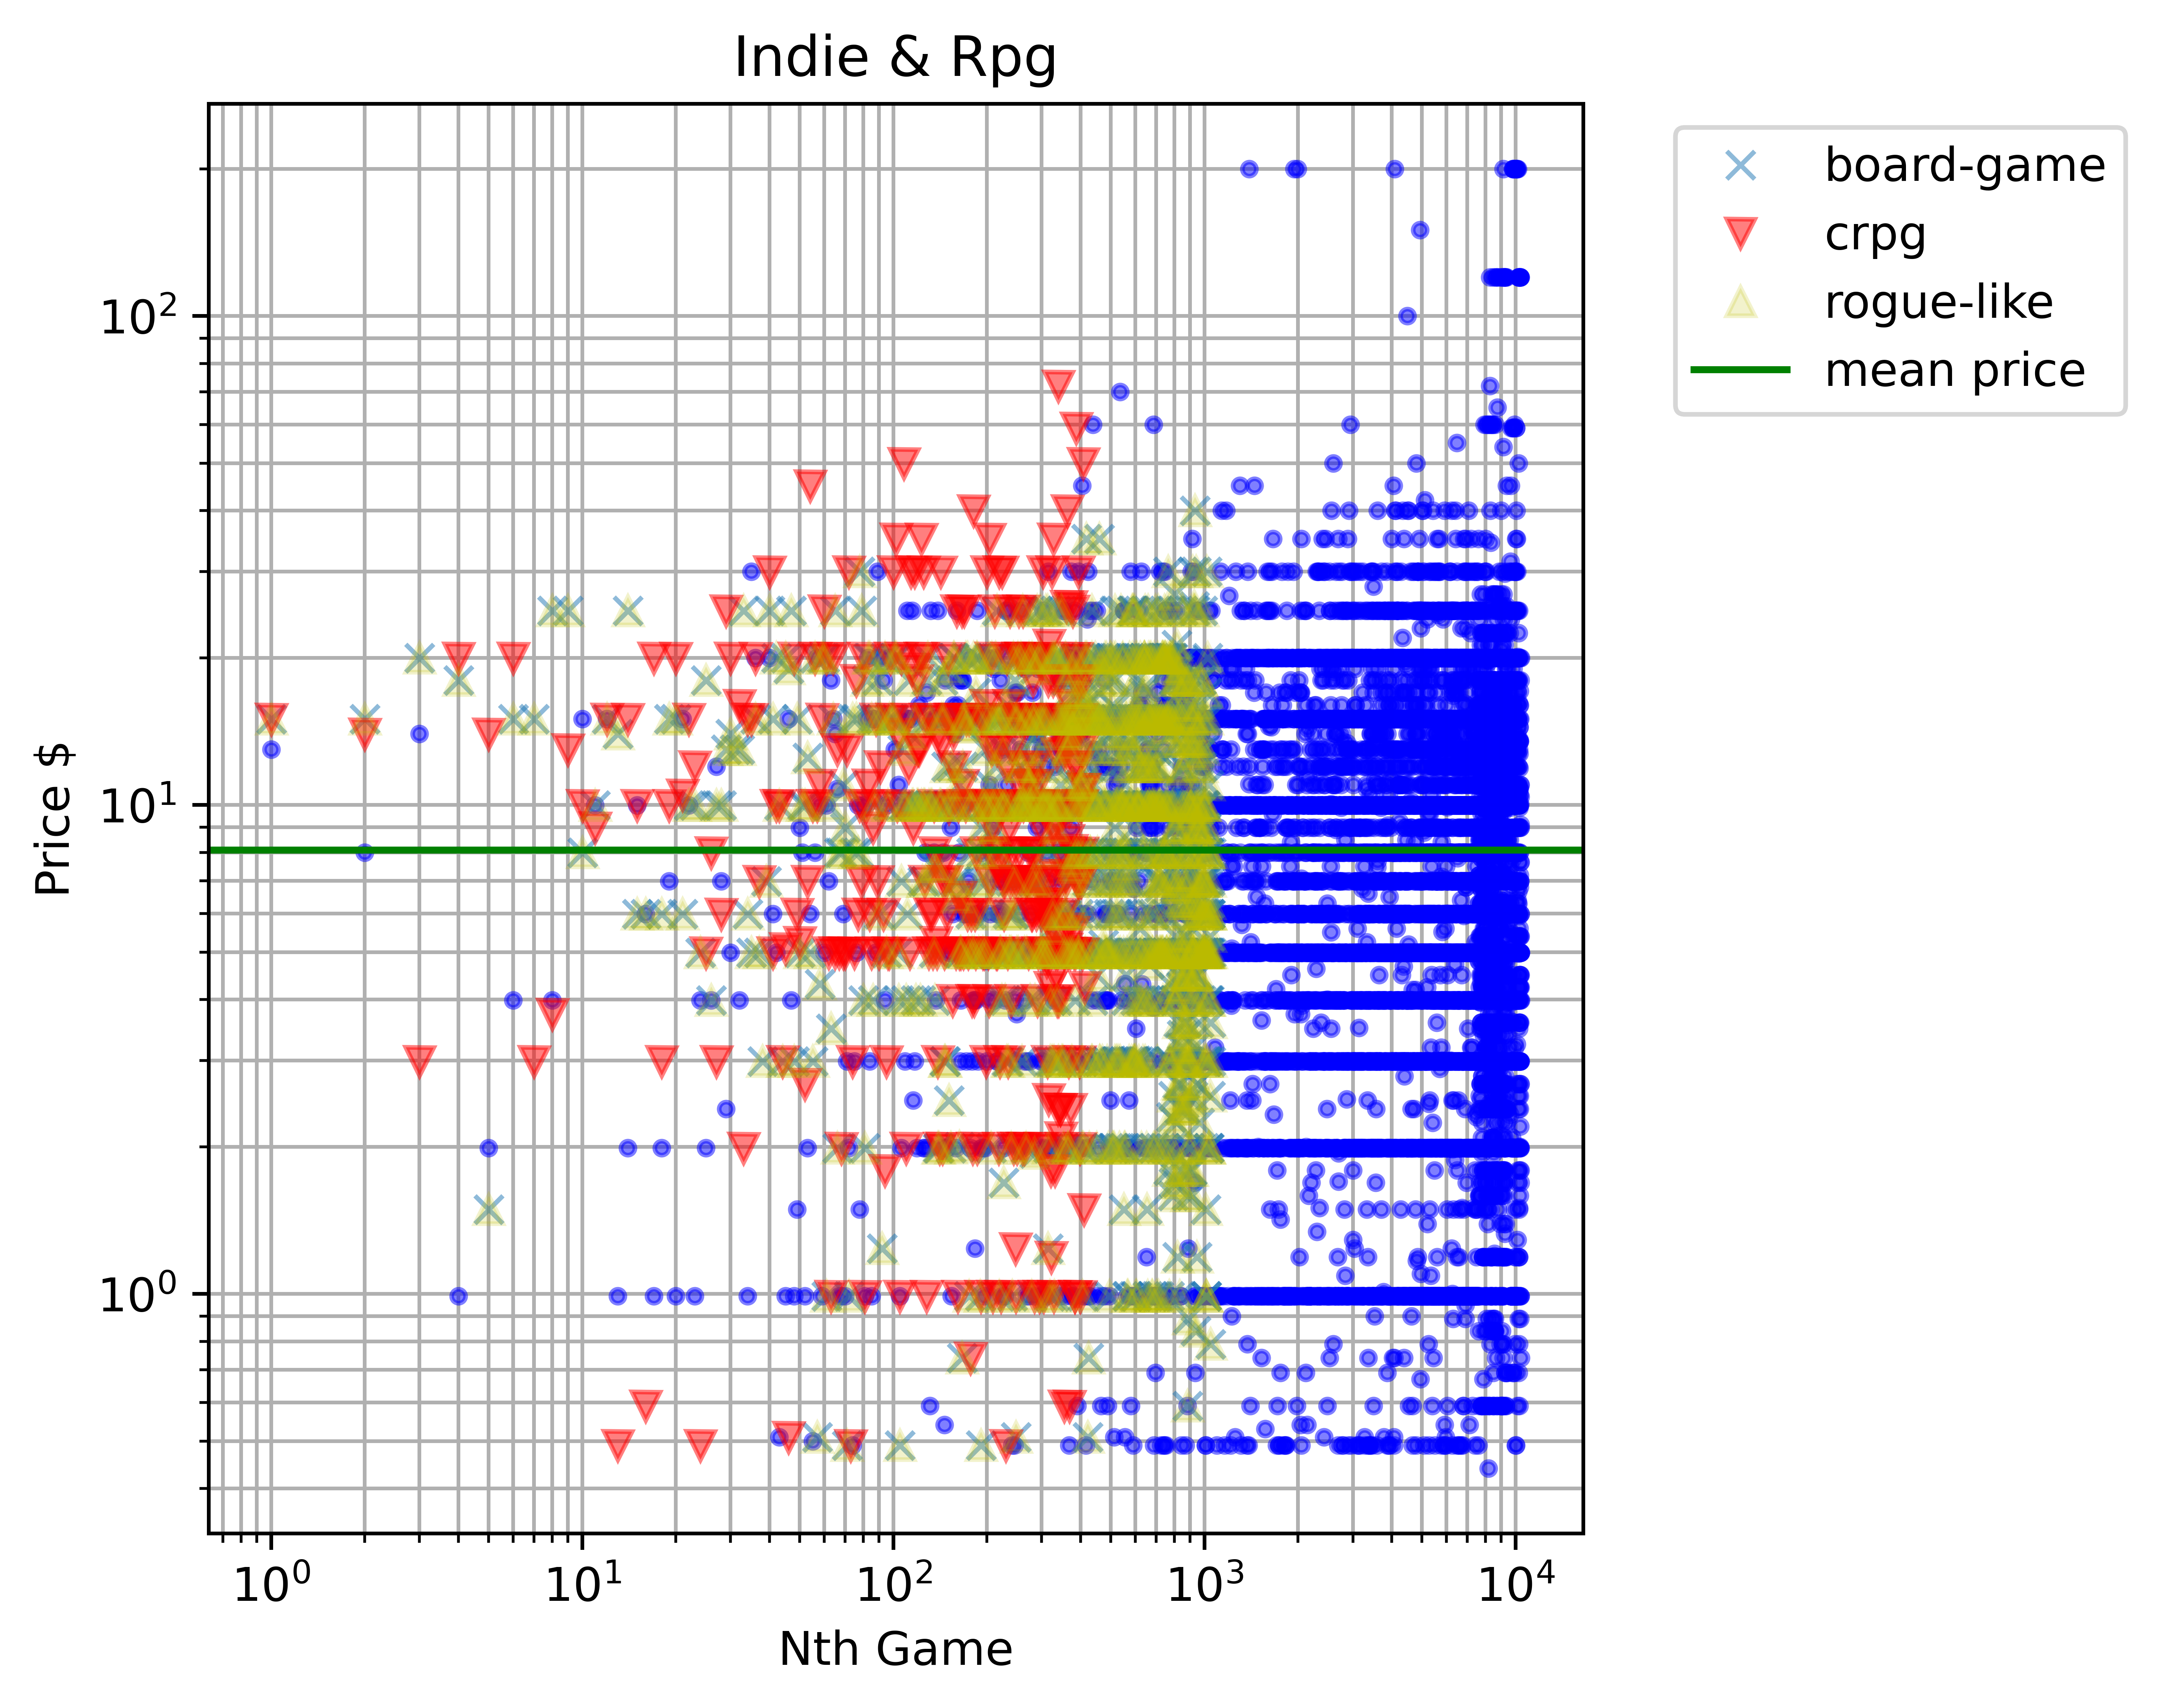

In [84]:
idx_top_genre = truthTable(idx_top_genre_indie,idx_top_genre_rpg)
result_indie_rpg_price = idx2intidx(price,idx_top_genre)

idx_crpg_top_genre = truthTable(idx_top_genre,idx_crpgs)
idx_roguelike_top_genre = truthTable(idx_top_genre,idx_roguelike)
idx_boardgame_top_genre = truthTable(idx_top_genre,idx_board_game)

idx_idx_crpg_price = idx2intidx(price,idx_crpg_top_genre)
idx_idx_roguelike_price = idx2intidx(price,idx_roguelike_top_genre)
idx_idx_boardgame_price = idx2intidx(price,idx_boardgame_top_genre)

mean_price = np.mean(result_indie_rpg_price)

# plt.plot(result_indie_rpg_price,'.')
fig1 = plt.figure(dpi=900)

plt.loglog(result_indie_rpg_price,'b.',alpha=0.5)
plt.loglog(idx_idx_roguelike_price,'x',label='board-game',alpha=0.5)
plt.loglog(idx_idx_crpg_price,'rv',label='crpg',alpha=0.5)
plt.loglog(idx_idx_roguelike_price,'y^',label='rogue-like',alpha=0.2)

plt.axhline(mean_price,c='green',label='mean price')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.title('Indie & Rpg')
plt.xlabel('Nth Game')
plt.ylabel('Price $')
plt.grid(True, which="both")
plt.show()

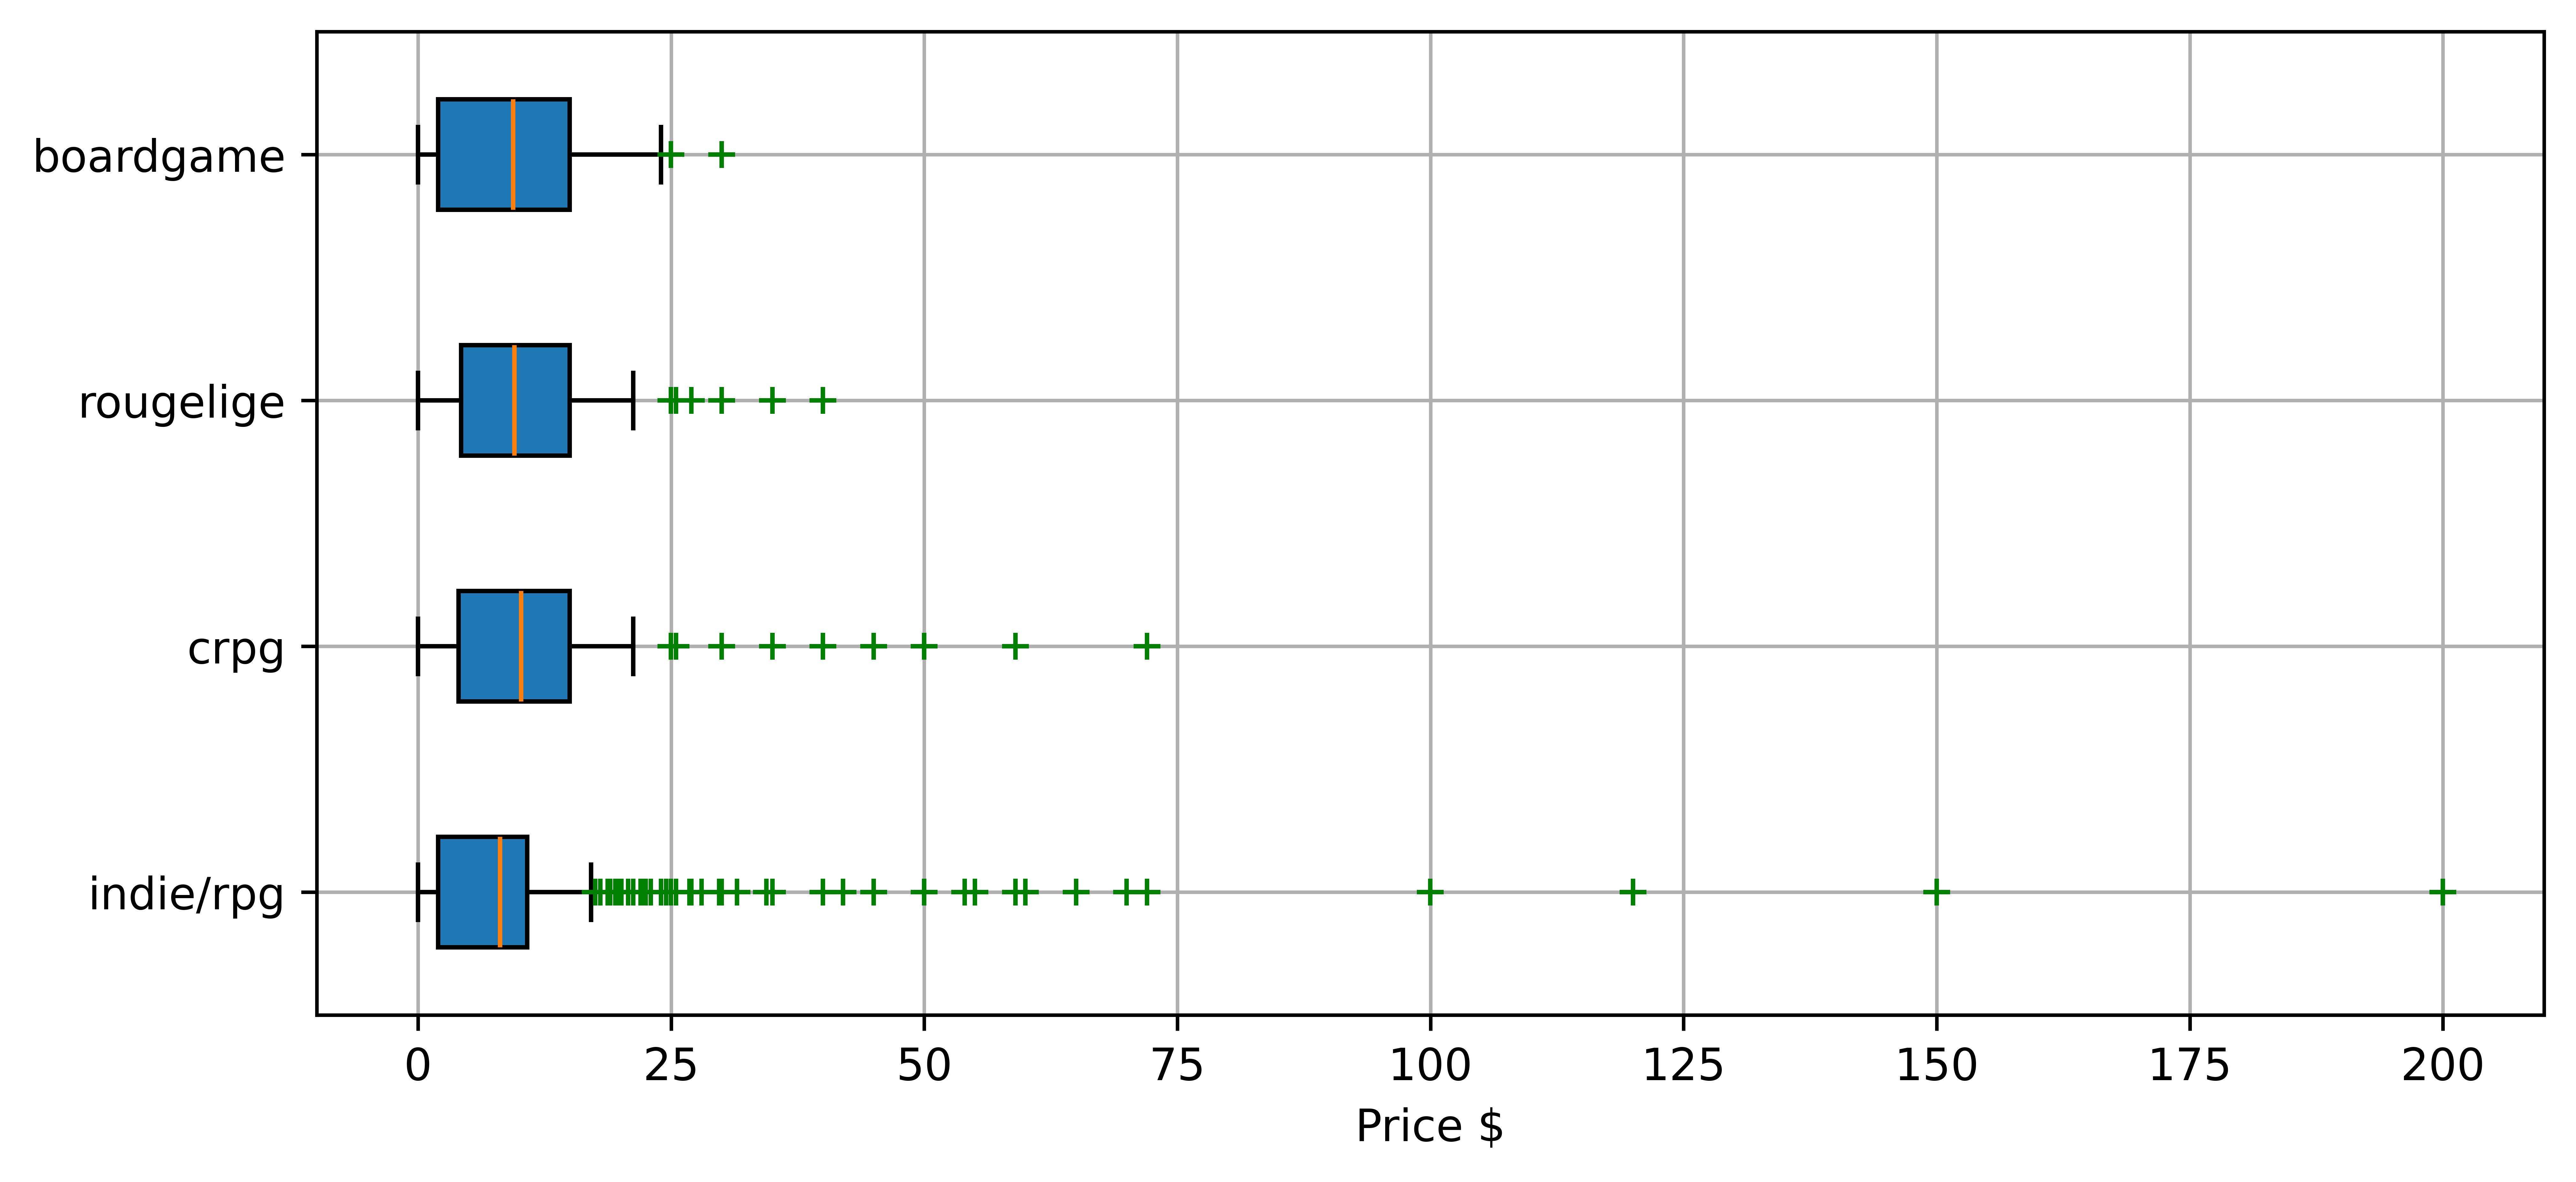

In [99]:
fig2,ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4),dpi=1000)

data = [result_indie_rpg_price,idx_idx_crpg_price,idx_idx_roguelike_price,idx_idx_boardgame_price]
ax.boxplot(data, notch=False, sym='g+', vert=False, whis=0.75, bootstrap=10000, usermedians=[np.mean(d) for d in data], conf_intervals=None, patch_artist=True)
plt.yticks([1, 2, 3,4], ['indie/rpg', 'crpg', 'rougelige','boardgame'])
plt.xlabel('Price $')
plt.grid(True, which="both")

plt.show()